# Digit Recognition using CNN
## Importing Stuff

In [3]:
import cv2
import numpy as np
from keras.datasets import mnist
from keras.layers import Dense, Flatten
from keras.layers.convolutional import Conv2D
from keras.models import Sequential
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

In [4]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

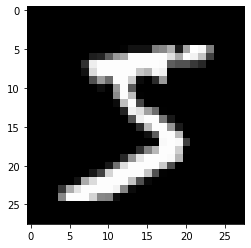

5


In [5]:
## Looking at a sample
plt.imshow(X_train[0], cmap="gray")
plt.show()
print (y_train[0])

## Data Preprocessing
### Reshaping Stuff
We need to reshape our dataset inputs (X_train and X_test) to the shape that our model expects when we train the model. The first number is the number of images (X_train -> 60000, X_test -> 10000). Then comes the shape of each image i.e. (28, 28). The last number 1 signifies that the image is greyscale

In [6]:
## Checking out the shapes involved in dataset
print ("Shape of X_train: {}".format(X_train.shape))
print ("Shape of y_train: {}".format(y_train.shape))
print ("Shape of X_test: {}".format(X_test.shape))
print ("Shape of y_test: {}".format(y_test.shape))

Shape of X_train: (60000, 28, 28)
Shape of y_train: (60000,)
Shape of X_test: (10000, 28, 28)
Shape of y_test: (10000,)


In [7]:
# Reshaping so as to convert images for our model
X_train = X_train.reshape(60000, 28, 28, 1)
X_test = X_test.reshape(10000, 28, 28, 1)

In [8]:
print ("Shape of X_train: {}".format(X_train.shape))
print ("Shape of y_train: {}".format(y_train.shape))
print ("Shape of X_test: {}".format(X_test.shape))
print ("Shape of y_test: {}".format(y_test.shape))

Shape of X_train: (60000, 28, 28, 1)
Shape of y_train: (60000,)
Shape of X_test: (10000, 28, 28, 1)
Shape of y_test: (10000,)


### One-Hot Encoding
We need to hot encode our target variables. Basically, a column will be created for each kind of output and a binary variable is inputted for each kind. For example, if the image is of the number 6, then the label instead of being = 6, it will have a value 1 in column 7 and 0 in rest of the columns, like [0,0,0,0,0,0,1,0,0]

In [9]:
### Lets one hot encode labels
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

## Building the model
Let's build the model

In [10]:
## Declare the model
model = Sequential()

## Declare the layers
layer_1 = Conv2D(64, kernel_size=3, activation='relu', input_shape=(28, 28, 1))
layer_2 = Conv2D(32, kernel_size=3, activation='relu')
layer_3 = Flatten()
layer_4 = Dense(10, activation='softmax')

## Add the layers to the model
model.add(layer_1)
model.add(layer_2)
model.add(layer_3)
model.add(layer_4)

The model type that we will be using is Sequential.<br>
Sequential is the easiest way to build a model in Keras. It allows to build the model layer by layer.<br>
*add()* function is used for adding successive layers.<br><br>
The first 2 layers are Conv2D layers. These are convolution layers that will deal with our input images, which are seen as 2D matrices.<br><br>
64 nodes in first layer and 32 nodes in the second layer are being used here. These numbers can be adjusted accordingly, depending on the size of the dataset. In this case, 64 and 32 seem to be working just fine.<br><br>
__Kernel Size__ is the size of the filter matrix for our convolution. So, kernel size 3 means that a 3x3 filter matrix is going to be used.<br><br>
__Activation__ is the activation function for the layer. The activation function here being used for the first 2 layers is the ReLU, or Rectified Linear Activation. This activation function is known for performing well in terms of speed and output in the neural nets.


### Flow of the model
- The first layer takes in an input shape, here, being 28, 28, 1 where 1 signifies greyscale.
- In between the Conv2D layers and the dense layer, there is a "Flatten" layer. Flatten serves as a connection between convolutional and dense layers.
- 'Dense' is the layer type which is being used for output layer. Dense is a standard layer type that is used in many cases for neural networks.
- We will have 10 nodes in our output layer, one for each possible outcome (0-9)
- The activation function is 'softmax'. Softmax makes the output sum up tp 1, so that the output contains a series of probabilities.
- The model will predict the one with the highest probability.


## Compiling the model
Compiling the model takes three parameters:
- __Optimizer__ - It controls the learning rate. We will be using 'adam' optimizer. It is a very good optimizer as it utilises the perks of both Stochastic gradient and RMSprop optimizers.
- __Loss function__ - We will be using 'categorical_crossentropy' loss function. It is the most common choice for classification. A lower score corresponds to better performance.
- __Metrics__ - To make things easier to interpret, we will be using 'accuracy' metrix to see the accuracy score on the validation set while training the model.

In [11]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

## Training the model

In [12]:
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=3)

Epoch 1/3
1875/1875 [==============================] - 71s 37ms/step - loss: 0.2932 - accuracy: 0.9517 - val_loss: 0.0933 - val_accuracy: 0.9702
Epoch 2/3
1875/1875 [==============================] - 79s 42ms/step - loss: 0.0716 - accuracy: 0.9782 - val_loss: 0.0808 - val_accuracy: 0.9754
Epoch 3/3
1875/1875 [==============================] - 76s 41ms/step - loss: 0.0512 - accuracy: 0.9834 - val_loss: 0.0859 - val_accuracy: 0.9746


Yayyyy!!!! The model seems to be ready after 3 epochs with an amazing accuracy around 97%

## Predicting and Testing

Prediction (Softmax) from the neural network:

 [[1.0000000e+00 4.4261627e-16 4.0853871e-09 5.0804031e-12 5.4154770e-14
  1.8538372e-12 1.7931812e-09 1.0223739e-11 6.2451244e-10 8.4184970e-09]]


Hard-maxed form of the prediction: 

 [[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


--------- Prediction --------- 




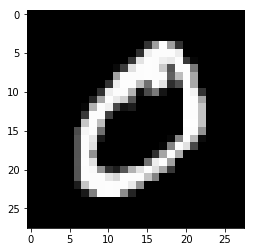



Final Output: 0


In [11]:
example = X_train[1]
prediction = model.predict(example.reshape(1, 28, 28, 1))
print ("Prediction (Softmax) from the neural network:\n\n {}".format(prediction))
hard_maxed_prediction = np.zeros(prediction.shape)
hard_maxed_prediction[0][np.argmax(prediction)] = 1
print ("\n\nHard-maxed form of the prediction: \n\n {}".format(hard_maxed_prediction))

print ("\n\n--------- Prediction --------- \n\n")
plt.imshow(example.reshape(28, 28), cmap="gray")
plt.show()
print("\n\nFinal Output: {}".format(np.argmax(prediction)))


## Let's test our model on a real image
### For that first of all, we will preprocess the image
These are the steps for preprocessing the image:
- Convert that image to greyscale
- Binarize(threshold) the greyscaled image in such a way that only the digits in the image are white and rest is black
- Using the binarized image, find contours in the image. Here, contours will provide us the individual digits in the image
- Now, we have the digits. But we have to modify it further in such a way that it becomes a lot more similar to the images present in the training dataset.
- Now, looking at an image in dataset. We can infer that the image has to be of shape (28, 28), it should contain the digit white colored and background black colored, and the digit in the image is not stretched to the boundaries, instead, around the digit, in each of the four sides, there is a 5 pixel region (padding) of black color. (You''ll understand this fully if you check out any of the image from the dataset).
- So, now for modifying our image, we'll resize it to (18,18)
- Then, we will add a padding of zeros (black color) of 5 pixels in each direction (top, bottom, left, right).
- So, the final padded image will be of the size (5+18+5, 5+18+5) = (28, 28), which is what we wanted.




----------------Contoured Image--------------------


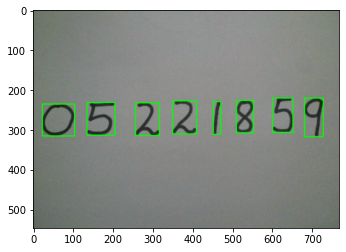

In [15]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image = cv2.imread("C:\\Users\\HariChandana\\Downloads\\0_ru86ka5SAIxQ917T.jpg")

# Convert to grayscale
grey = cv2.cvtColor(image.copy(), cv2.COLOR_BGR2GRAY)

# Apply threshold
ret, thresh = cv2.threshold(grey.copy(), 75, 255, cv2.THRESH_BINARY_INV)

# Find contours
contours, _ = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

preprocessed_digits = []

for c in contours:
    x, y, w, h = cv2.boundingRect(c)
    
    # Creating a rectangle around the digit in the original image (for displaying the digits fetched via contours)
    cv2.rectangle(image, (x, y), (x + w, y + h), color=(0, 255, 0), thickness=2)
    
    # Cropping out the digit from the image corresponding to the current contours in the for loop
    digit = thresh[y:y+h, x:x+w]
    
    # Resizing that digit to (18, 18)
    resized_digit = cv2.resize(digit, (18, 18))
    
    # Padding the digit with 5 pixels of black color (zeros) on each side to finally produce the image of (28, 28)
    padded_digit = np.pad(resized_digit, ((5, 5), (5, 5)), "constant", constant_values=0)
    
    # Adding the preprocessed digit to the list of preprocessed digits
    preprocessed_digits.append(padded_digit)

print("\n\n\n----------------Contoured Image--------------------")
plt.imshow(image, cmap="gray")
plt.show()

inp = np.array(preprocessed_digits)


## Let's predict stuff !!
Here, in the prediction, Alongside the digit and predicted output, I'll be showing the softmaxed output of a prediction and the hardmaxed form of it.



---------------------------------------


=========PREDICTION============ 




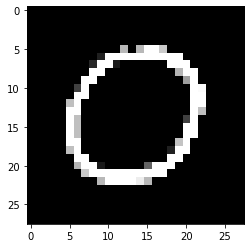



Final Output: 9

Prediction (Softmax) from the neural network:

 [[1.5768850e-01 2.5791788e-16 1.3746319e-07 1.6304263e-12 1.1616150e-14
  2.5972696e-10 2.9061715e-07 5.3213389e-10 1.4686805e-05 8.4229642e-01]]


Hard-maxed form of the prediction: 

 [[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]


---------------------------------------




---------------------------------------


=========PREDICTION============ 




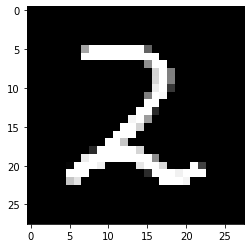



Final Output: 2

Prediction (Softmax) from the neural network:

 [[8.1737764e-19 4.3057553e-09 1.0000000e+00 3.2134044e-09 5.3403176e-23
  9.6042697e-21 7.5793081e-21 4.8824148e-15 1.4367443e-10 5.7693086e-22]]


Hard-maxed form of the prediction: 

 [[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]]


---------------------------------------




---------------------------------------


=========PREDICTION============ 




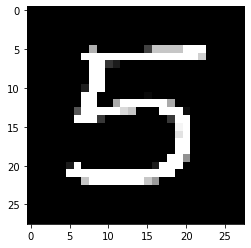



Final Output: 5

Prediction (Softmax) from the neural network:

 [[1.3712488e-18 4.4721926e-23 9.4757437e-19 1.1719601e-12 8.5597270e-22
  1.0000000e+00 4.3150608e-17 1.3829807e-16 1.4679185e-13 1.7310316e-15]]


Hard-maxed form of the prediction: 

 [[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]]


---------------------------------------




---------------------------------------


=========PREDICTION============ 




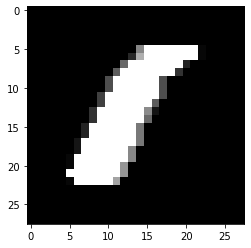



Final Output: 8

Prediction (Softmax) from the neural network:

 [[1.8747762e-02 1.9162200e-05 1.4489254e-05 3.1914180e-05 1.4425568e-05
  2.2798263e-04 5.3092290e-06 1.6286966e-08 7.9885167e-01 1.8208729e-01]]


Hard-maxed form of the prediction: 

 [[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]]


---------------------------------------




---------------------------------------


=========PREDICTION============ 




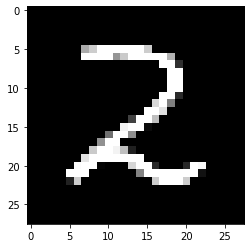



Final Output: 2

Prediction (Softmax) from the neural network:

 [[2.5942539e-18 1.2127820e-15 1.0000000e+00 5.9555721e-10 2.1461723e-25
  2.1659933e-18 1.2184920e-20 6.0189299e-13 4.9002393e-13 7.3125383e-21]]


Hard-maxed form of the prediction: 

 [[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]]


---------------------------------------




---------------------------------------


=========PREDICTION============ 




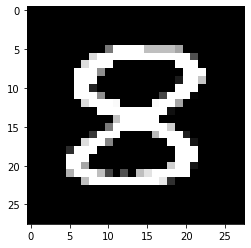



Final Output: 8

Prediction (Softmax) from the neural network:

 [[2.5883397e-20 1.3999686e-20 6.7304157e-08 3.8849279e-09 1.5391441e-19
  1.8006645e-11 2.3024278e-17 1.2966408e-15 9.9999988e-01 1.9993287e-12]]


Hard-maxed form of the prediction: 

 [[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]]


---------------------------------------




---------------------------------------


=========PREDICTION============ 




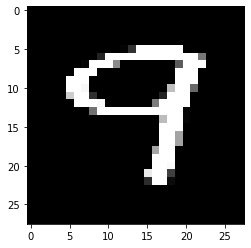



Final Output: 9

Prediction (Softmax) from the neural network:

 [[1.3767837e-10 7.9698407e-14 1.9165667e-05 3.0976707e-02 3.4343557e-07
  8.6883193e-07 8.6545340e-17 1.7398912e-01 2.4306495e-01 5.5194890e-01]]


Hard-maxed form of the prediction: 

 [[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]


---------------------------------------




---------------------------------------


=========PREDICTION============ 




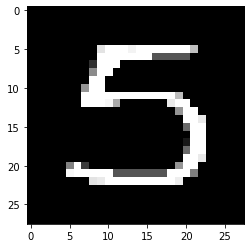



Final Output: 5

Prediction (Softmax) from the neural network:

 [[1.0688417e-12 6.3638772e-18 1.6710656e-16 9.6153263e-09 1.0123575e-18
  1.0000000e+00 9.7385157e-15 2.6819783e-12 6.2383085e-12 3.6961618e-11]]


Hard-maxed form of the prediction: 

 [[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]]


---------------------------------------




In [16]:
for digit in preprocessed_digits:
    prediction = model.predict(digit.reshape(1, 28, 28, 1))   
    print ("\n\n---------------------------------------\n\n")
    print ("=========PREDICTION============ \n\n")
    plt.imshow(digit.reshape(28, 28), cmap="gray")
    plt.show()
    print("\n\nFinal Output: {}".format(np.argmax(prediction)))
    print ("\nPrediction (Softmax) from the neural network:\n\n {}".format(prediction))
    hard_maxed_prediction = np.zeros(prediction.shape)
    hard_maxed_prediction[0][np.argmax(prediction)] = 1
    print ("\n\nHard-maxed form of the prediction: \n\n {}".format(hard_maxed_prediction))
    print ("\n\n---------------------------------------\n\n")